In [2]:
# combine and output the data from dasgib runs nicely
# We want pH, dO, agitation, temperature...maybe gassing?
# We will do...multiple formats
# 1: Wide: 1 column per parameter plus 1 bioreactor id column and 1 timestamp column
# 2: Long: id, timestamp, parameter, value

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# the run is broken into 2 files because we restarted midway.
# "Manager 5.Control.csv" first and then "Manager 13.Control.csv"

# the files have a bunch of header info and then a data section per reactor
# each section starts with a line: "[TrackData1]" followed by a line with all the columns (1 per parameter) and then 1 row per observation

# I will run through the file and identify the "[TrackDataX]" lines and then have pandas read the data between them
# The last TrackData ends with a line named "[Events]"

In [128]:
data_lines_5 = []
first = True
with open('Manager 5.Control.csv', 'rb') as f:
    for n, line in enumerate(f.readlines()):
        if line.decode('ISO-8859-2').startswith('"[TrackData'):
            # data start
            if first:
                # skip the first, its just introducing the section
                first = False
            else:
                data_lines_5.append(n)
        if line.decode('ISO-8859-2').startswith('"[Events]'):
            # final line
            data_lines_5.append(n)
            break

data_lines_13 = []
first = True
with open('Manager 13.Control.csv', 'rb') as f:
    for n, line in enumerate(f.readlines()):
        if line.decode('ISO-8859-2').startswith('"[TrackData'):
            # data start
            if first:
                # skip the first, its just introducing the section
                first = False
            else:
                data_lines_13.append(n)
        if line.decode('ISO-8859-2').startswith('"[Events]'):
            # final line
            data_lines_13.append(n)
            break
print(data_lines_5)
print(data_lines_13)

final line found: 32700
final line found: 56858
[350, 4394, 8438, 12482, 16526, 20570, 24614, 28657, 32700]
[350, 7414, 14478, 21542, 28606, 35669, 42732, 49795, 56858]


In [149]:
dfs = []

for rid in range(8):
    df = pd.read_csv("Manager 5.Control.csv", sep=';', encoding="ISO-8859-2", skiprows=data_lines_5[rid]+1, nrows=data_lines_5[rid+1]-data_lines_5[rid]-4)
    df['rid'] = rid+1
    keep_cols = ['Duration', 'rid', 'Timestamp', f'Unit {rid+1}.DO{rid+1}.PV [%DO]', f'Unit {rid+1}.pH{rid+1}.PV [pH]', f'Unit {rid+1}.T{rid+1}.PV [°C]', f'Unit {rid+1}.N{rid+1}.PV [rpm]', f'Unit {rid+1}.F{rid+1}.PV [sL/h]', f'Unit {rid+1}.FAir{rid+1}.PV [sL/h]', f'Unit {rid+1}.FCO2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.FN2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.FO2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.XCO2 {rid+1}.PV [%]', f'Unit {rid+1}.XO2 {rid+1}.PV [%]']
    df = df[keep_cols]
    df.columns = ['Duration', 'rid', 'Timestamp', 'DO [%DO]', 'pH [pH]', 'T [°C]', 'N [rpm]', 'F [sL/h]', 'FAir [sL/h]', 'FCO2 [sL/h]', 'FN2 [sL/h]', 'FO2 [sL/h]', 'XCO2 [%]', 'XO2 [%]']
    dfs.append(df)
for rid in range(8):
    df = pd.read_csv("Manager 13.Control.csv", sep=';', encoding="ISO-8859-2", skiprows=data_lines_13[rid]+1, nrows=data_lines_13[rid+1]-data_lines_13[rid]-4)
    df['rid'] = rid+1
    keep_cols = ['Duration', 'rid', 'Timestamp', f'Unit {rid+1}.DO{rid+1}.PV [%DO]', f'Unit {rid+1}.pH{rid+1}.PV [pH]', f'Unit {rid+1}.T{rid+1}.PV [°C]', f'Unit {rid+1}.N{rid+1}.PV [rpm]', f'Unit {rid+1}.F{rid+1}.PV [sL/h]', f'Unit {rid+1}.FAir{rid+1}.PV [sL/h]', f'Unit {rid+1}.FCO2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.FN2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.FO2 {rid+1}.PV [sL/h]', f'Unit {rid+1}.XCO2 {rid+1}.PV [%]', f'Unit {rid+1}.XO2 {rid+1}.PV [%]']
    df = df[keep_cols]
    df.columns = ['Duration', 'rid', 'Timestamp', 'DO [%DO]', 'pH [pH]', 'T [°C]', 'N [rpm]', 'F [sL/h]', 'FAir [sL/h]', 'FCO2 [sL/h]', 'FN2 [sL/h]', 'FO2 [sL/h]', 'XCO2 [%]', 'XO2 [%]']
    dfs.append(df)
dfs = pd.concat(dfs)
dfs['Timestamp'] = pd.to_datetime(dfs['Timestamp'])

In [150]:
dfs

Duration  rid           Timestamp  DO [%DO]  pH [pH]  T [°C]  N [rpm]  \
0     0.000694    1 2024-06-10 13:57:39     0.000    0.000   0.000      0.0   
1     0.001389    1 2024-06-10 13:58:39   100.063    7.883  36.658      0.0   
2     0.002083    1 2024-06-10 13:59:39   100.250    7.882  36.554      0.0   
3     0.002778    1 2024-06-10 14:00:39   100.419    7.747  36.472     80.0   
4     0.003472    1 2024-06-10 14:01:39    99.212    7.233     NaN     80.0   
...        ...  ...                 ...       ...      ...     ...      ...   
7054  4.899306    8 2024-06-18 07:08:09       NaN      NaN     NaN      NaN   
7055  4.900000    8 2024-06-18 07:09:09       NaN      NaN     NaN      NaN   
7056  4.900694    8 2024-06-18 07:10:09       NaN      NaN     NaN      NaN   
7057  4.901389    8 2024-06-18 07:11:09       NaN      NaN  36.938      NaN   
7058  4.902083    8 2024-06-18 07:12:09       NaN      NaN     NaN      NaN   

      F [sL/h]  FAir [sL/h]  FCO2 [sL/h]  FN2 [sL/h]  FO2 [sL/h]  XCO2 [%]  \
0        0.000     0.000000     0.000000       0.000         0.0      0.00   
1        0.922     0.000000     0.000000       0.922         0.0      0.00   
2        0.138     0.000000     0.000000       0.143         NaN      0.00   
3        8.502     1.961917     6.539738       0.000         NaN     76.92   
4       10.770     3.045592     7.724244         NaN         NaN     71.72   
...        ...          ...          ...         ...         ...       ...   
7054       NaN          NaN          NaN         NaN         NaN       NaN   
7055       NaN          NaN          NaN         NaN         NaN       NaN   
7056       NaN          NaN          NaN         NaN         NaN       NaN   
7057       NaN          NaN          NaN         NaN         NaN       NaN   
7058       NaN          NaN          NaN         NaN         NaN       NaN   

      XO2 [%]  
0        0.00  
1        0.00  
2        0.00  
3        4.85  
4        5.94  
...       ...  
7054      NaN  
7055      NaN  
7056      NaN  
7057      NaN  
7058      NaN  

[88794 rows x 14 columns]

In [154]:
dfs.to_excel("dasgip_2024.xlsx")

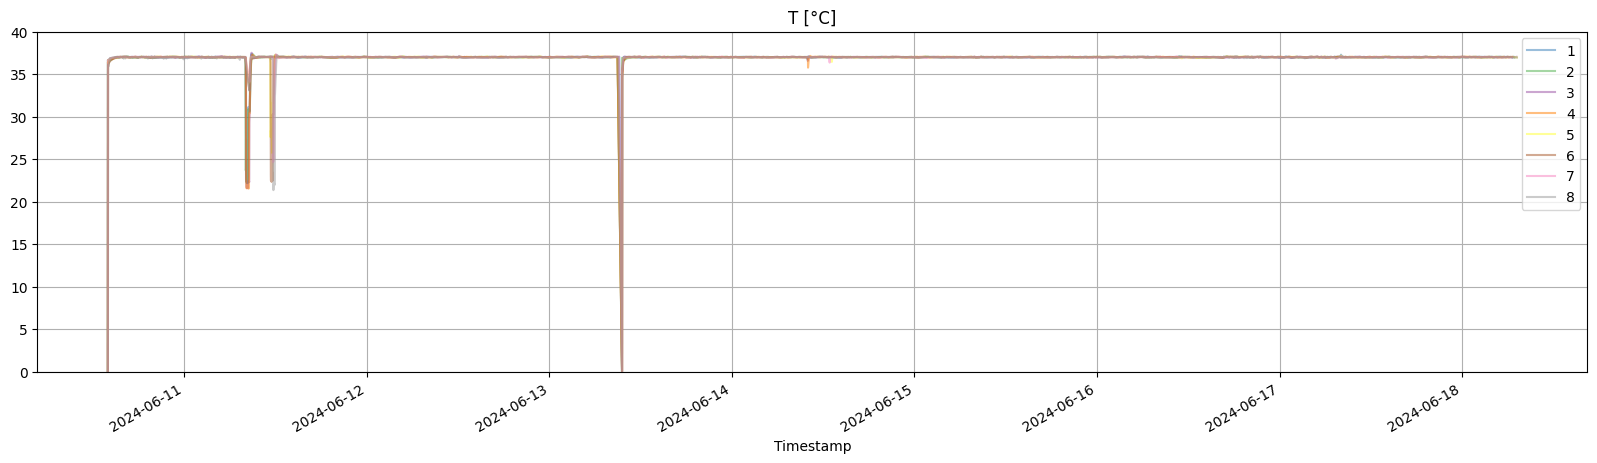

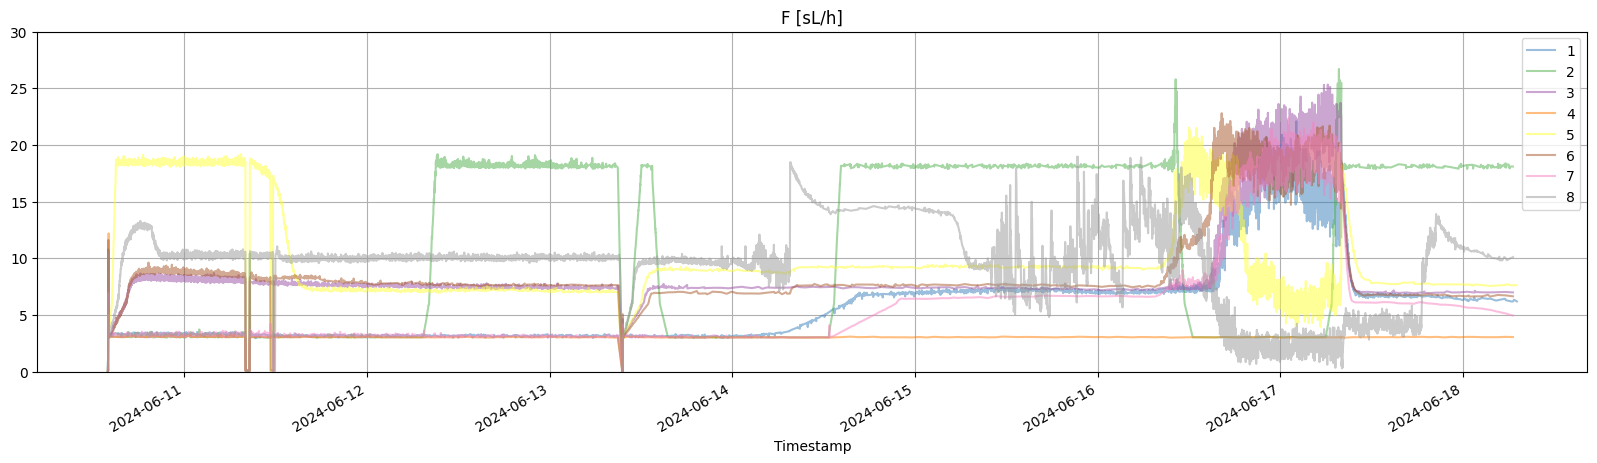

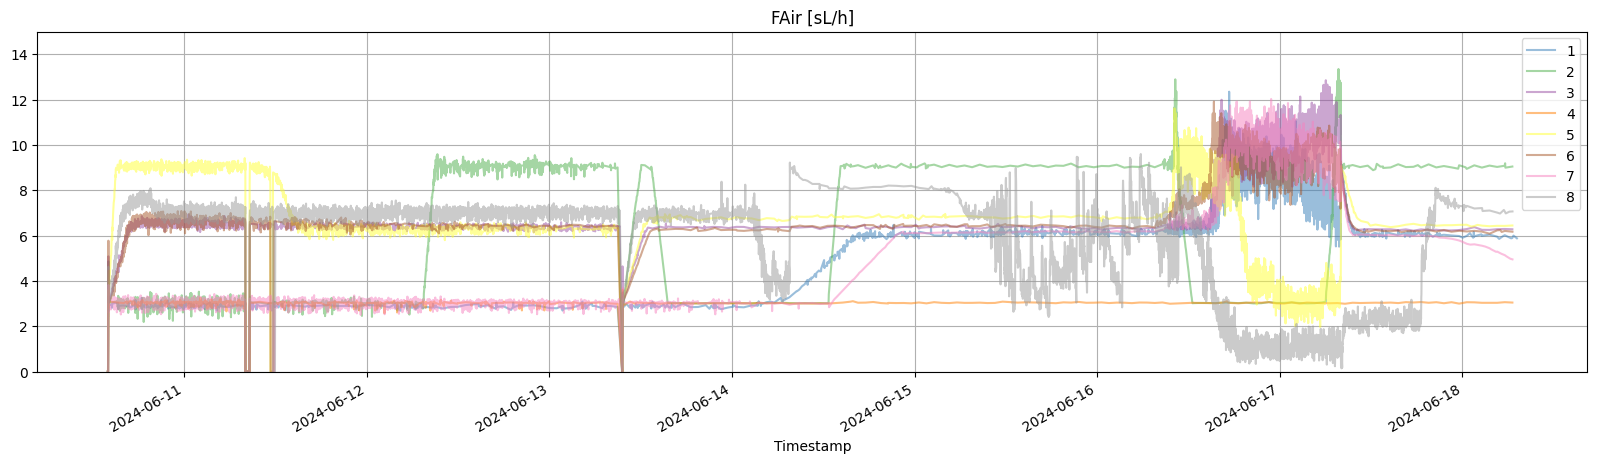

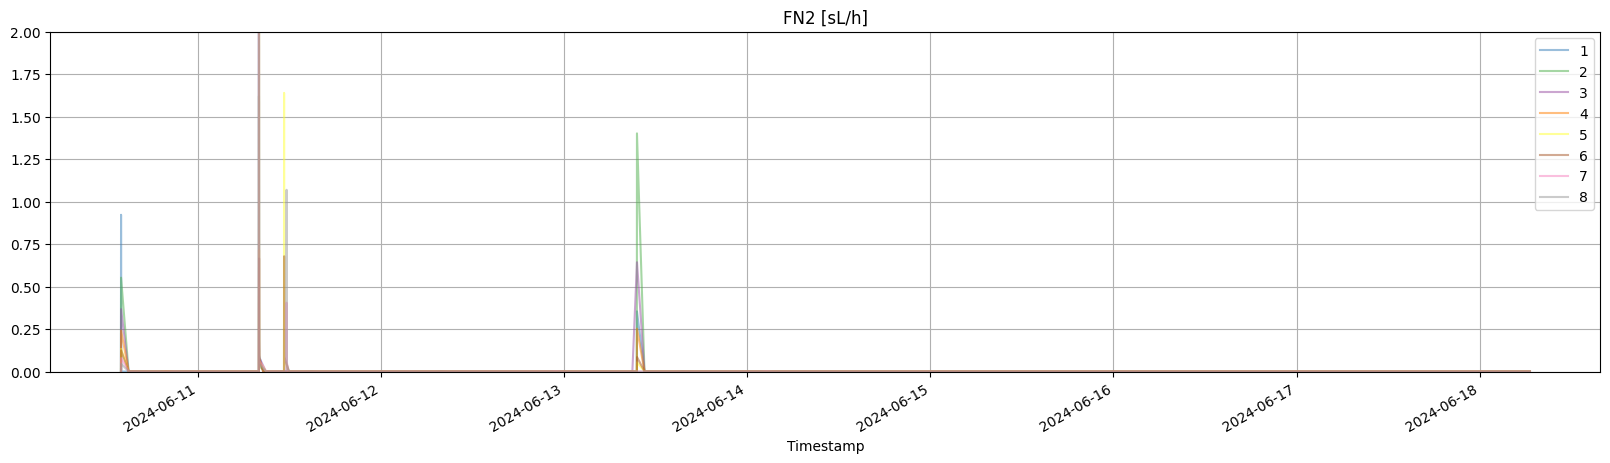

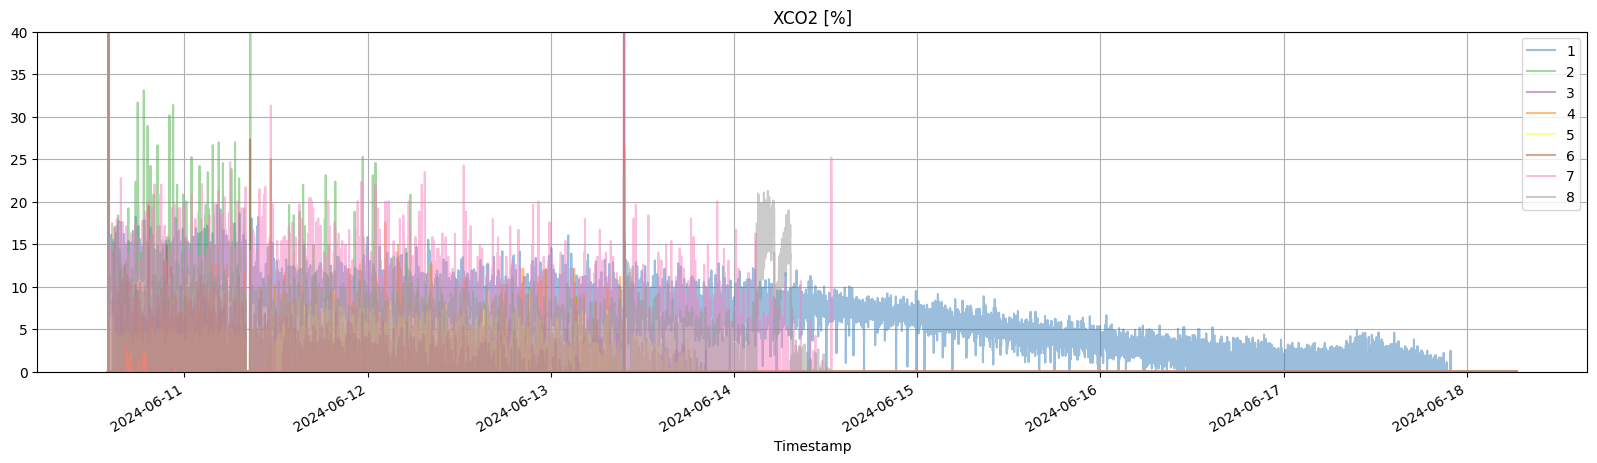

In [155]:
for col, lim in [('DO [%DO]', (0,100)),('pH [pH]', (5.5,7.5)),('T [°C]', (0,40)),('N [rpm]', (50,200)),('F [sL/h]', (0,30)),('FAir [sL/h]', (0,15)),('FCO2 [sL/h]', (0,2)),('FN2 [sL/h]', (0,2)),('FO2 [sL/h]', (0,15)),('XCO2 [%]', (0,40)),('XO2 [%]', (0,80))]:
    f, ax = plt.subplots(figsize=(20,5))
    ax.set_title(col)
    cmap = plt.colormaps.get_cmap('jet')
    for g, d in dfs.groupby('rid'):
        dd = d.set_index('Timestamp')
        dd = dd[col].dropna()
        dd.plot(ax=ax, label=g, color=plt.cm.Set1.colors[g], ylim=lim, grid=True, legend=True, alpha=0.5)
    f.savefig(f"{"".join(x for x in col if x.isalnum())}.jpg")